In [28]:
import matplotlib.pyplot as plt

import numpy as np

import scipy.stats as stats

In [173]:
scale = 1000

num_steps = 10000

num_accumulators = 2

v_true = 2.0 / scale
v_false = 1.0 / scale

s_true = 1.5 / np.sqrt(scale)
s_false = 1.0 / np.sqrt(scale)

b = 2.0

t0 = 100

A = 0.4

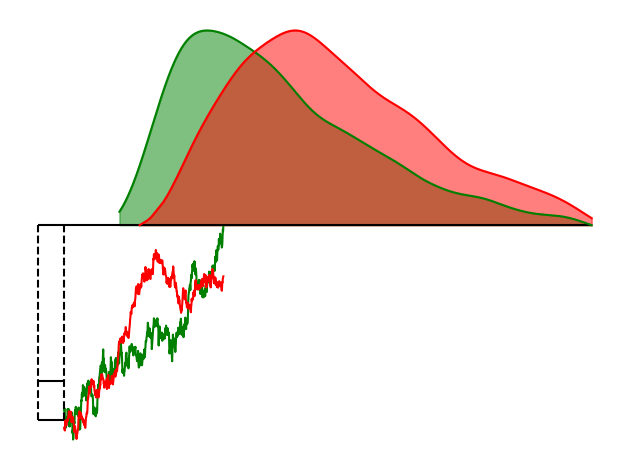

In [175]:
rng = np.random.default_rng(3)

X = np.cumsum(rng.normal(loc=[v_true, v_false], scale=[s_true,s_false], size=(num_steps, num_accumulators)), axis=0)

max_steps = np.where(X >= b)[0].min()

X = X[:max_steps, :]

t = np.arange(max_steps)

mu = b / np.array([v_true, v_false])
lam = (b / np.array([s_true, s_false])) ** 2

num_obs = 10000

# First passage time
fpt = np.zeros((num_accumulators, num_obs))

for i in range(num_accumulators):
    fpt[i, :] = rng.wald(mu[i], lam[i], size=num_obs)

max_rt = 2000

resp = fpt.argmin(axis=0)
rt = fpt.min(axis=0) + t0
resp = resp[rt < max_rt]
rt = rt[rt < max_rt]

rt_true = rt[resp == 0]
rt_false = rt[resp == 1]

rt_true.sort()
rt_false.sort()

kernel_true = stats.gaussian_kde(rt_true)
kernel_false = stats.gaussian_kde(rt_false)

dens_true = kernel_true(rt_true)
dens_true = (dens_true - dens_true.min()) / (dens_true.max() - dens_true.min()) * b + b
dens_false = kernel_false(rt_false)
dens_false = (dens_false - dens_false.min()) / (dens_false.max() - dens_false.min()) * b + b

fig, ax = plt.subplots(1, 1)

color_dict = {
    0: "green",
    1: "red"
}

for i in range(num_accumulators):
    ax.plot(t, X[:, i], color=color_dict[i])

ax.hlines(b, xmin=-t0, xmax=max_rt, colors="black")
ax.hlines(0, xmin=-t0, xmax=0, colors="black")

ax.vlines(0, ymin=0, ymax=2, linestyles="--", colors="black")
ax.vlines(-t0, ymin=0, ymax=2, linestyles="--", colors="black")

ax.hlines(A, xmin=-t0, xmax=0, colors="black")

# ax.vlines(max_rt, ymin=0, ymax=2, linestyles="-", colors="black")

ax.plot(rt_true, dens_true, color=color_dict[0])
ax.fill_between(rt_true, dens_true, b, color=color_dict[0], alpha=0.5)
ax.plot(rt_false, dens_false, color=color_dict[1])
ax.fill_between(rt_false, dens_false, b, color=color_dict[1], alpha=0.5)

ax.set_axis_off()

plt.tight_layout()

plt.show()

In [148]:
kernel_true(rt_true) 

array([1.56495080e-04, 1.75850377e-04, 1.82034101e-04, ...,
       1.25640592e-06, 1.25641982e-06, 7.61391049e-07])

In [145]:
kernel = stats.gaussian_kde(rt[resp == 0])


In [146]:
rt_true

array([ 209.37296997,  217.09492166,  219.44562997, ..., 4205.57137349,
       4261.41195167, 4413.92602055])

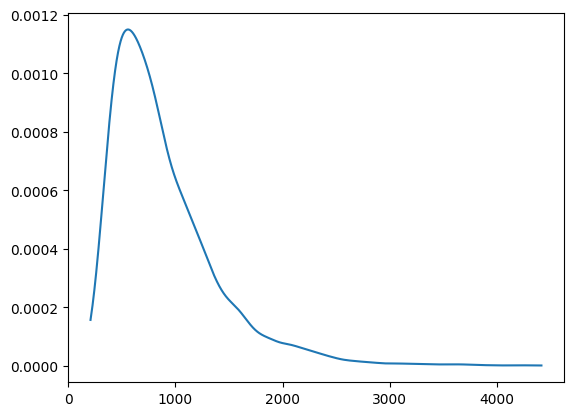

In [147]:
plt.plot(rt_true, kernel_true(rt_true))